In [2]:
#Der importeres nødvendige pakker:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.fft import fft, fftfreq
import sympy as sp

# 13-month smoothed monthly total sunspot number 1-1749 to now

In [3]:
#Dataet hentes
Rådata = np.genfromtxt('13-month smoothed monthly total sunspot number 1-1749 to now.csv', delimiter=';')

#År og solpletantal hentes, hvor de yderste datapunkter er fjernet, da disse ikke giver noget betydningsfuldt endnu:
Dato_brøkdel = Rådata[6:-6,2]
Monthly_smoothed_sunspot_number = Rådata[6:-6,3]

#Minimum
Proxy_minimum_dato = np.array([1755+2/13 , 1766+6/13 , 1775+6/13 , 1784+9/13 , 1798+4/13 , 1810+7/13 , 1823+5/13 , 1833+11/13 , 1843+7/13, 1855+12/13,
                    1867+3/13 , 1878+12/13 , 1890+3/13 , 1902+1/13 , 1913+7/13 , 1923+8/13 , 1933+9/13 , 1944+2/13 , 1954+4/13 , 1964+10/12,
                    1976+3/13 , 1986+9/13 , 1996+8/13 , 2008+12/13 , 2019+12/13])

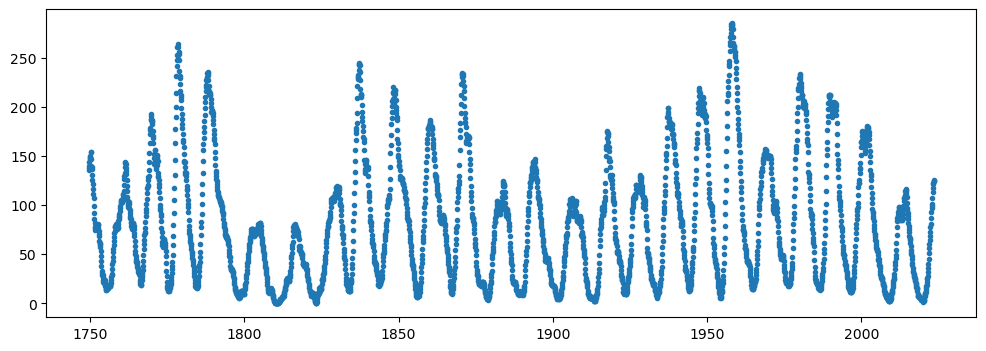

In [4]:
plt.figure(figsize=(12,4))
plt.plot(Dato_brøkdel , Monthly_smoothed_sunspot_number,'.')

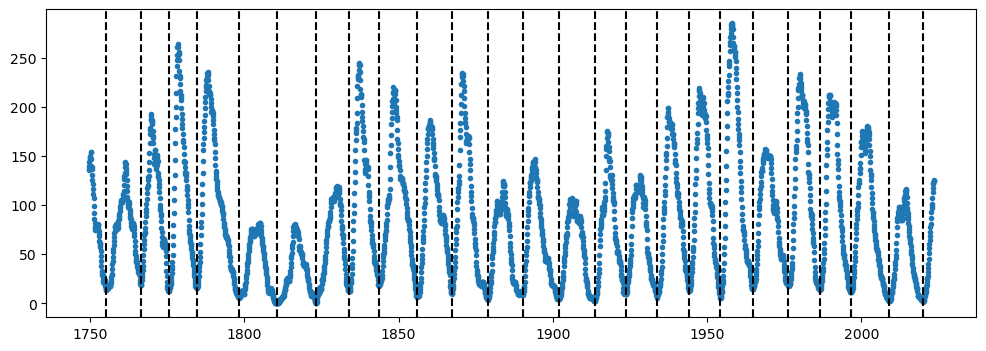

In [5]:
plt.figure(figsize=(12,4))
plt.plot(Dato_brøkdel , Monthly_smoothed_sunspot_number,'.')
for x in Proxy_minimum_dato:
    plt.axvline(x, color='black', linestyle='dashed')

# Opdeler cyklerne

In [6]:
Cykler = []
for k in range( len(Proxy_minimum_dato)-1 ):
    Maske=(Proxy_minimum_dato[k] < Dato_brøkdel) & (Dato_brøkdel < Proxy_minimum_dato[k+1])
    x = Dato_brøkdel[Maske]
    y = Monthly_smoothed_sunspot_number[Maske]
    Cykler.append([x,y])
    if k == 23:
        Maske=(Cykler[23][0][-1] < Dato_brøkdel) & (Dato_brøkdel < 2025)
        x = Dato_brøkdel[Maske]
        y = Monthly_smoothed_sunspot_number[Maske]
        Cykler.append([x,y])

#### Maksimum

In [7]:
Maximum_dato = []
Maximum_plet = []

for n in range( len(Cykler) ):
    Maximum_dato.append( Cykler[n][0][ np.where(Cykler[n][1] == np.max(Cykler[n][1]))[0][0] ])
    Maximum_plet.append(Cykler[n][1][ np.where(Cykler[n][1] == np.max(Cykler[n][1]))[0][0] ] )


Cykler_max = []
for k in range( len(Maximum_dato)-1 ):
    Maske=(Maximum_dato[k] < Dato_brøkdel) & (Dato_brøkdel < Maximum_dato[k+1])
    x = Dato_brøkdel[Maske]
    y = Monthly_smoothed_sunspot_number[Maske]
    Cykler_max.append([x,y])

#### Minimum

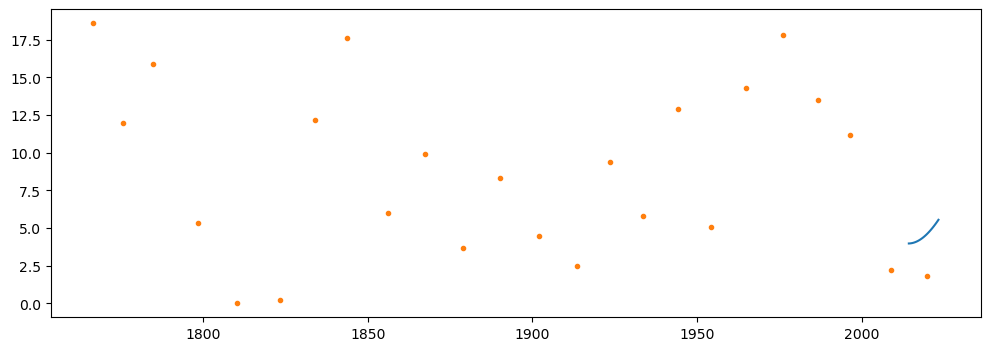

In [8]:
Minimum_dato = []
Minimum_plet = []

for n in range( len(Cykler_max) ):
    Minimum_dato.append( Cykler_max[n][0][ np.where(Cykler_max[n][1] == np.min(Cykler_max[n][1]))[0][0] ])
    Minimum_plet.append(Cykler_max[n][1][ np.where(Cykler_max[n][1] == np.min(Cykler_max[n][1]))[0][0] ] )

def Sin_min(x,a,b,c,d):
    return a * np.sin( x * b + c ) + d
Var_min , Cov_min = curve_fit(Sin_min , Minimum_dato , Minimum_plet , p0=[10,1/12,1,10])
yy=Sin_min(x,*Var_min)


plt.figure(figsize=(12,4))
plt.plot(x,yy)
plt.plot(Minimum_dato , Minimum_plet , '.')


# Fit til data

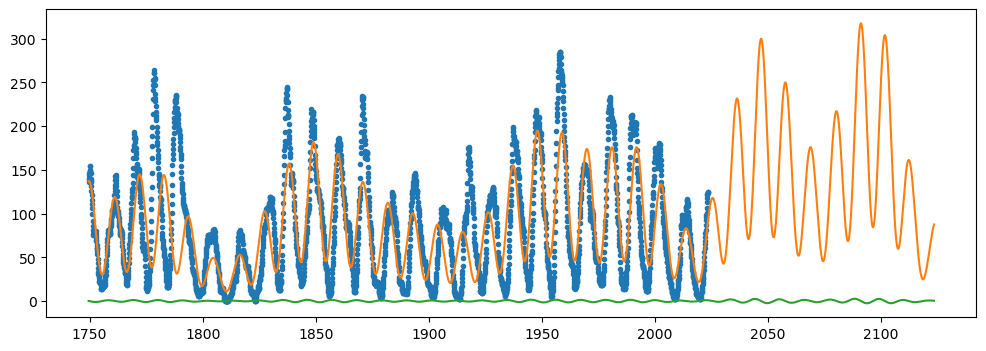

In [9]:
#1
def sin1(x,a,b,c,d):
    return a * np.sin( x * b + c ) + d
Var1 , Cov1 = curve_fit(sin1 , Dato_brøkdel , Monthly_smoothed_sunspot_number , p0=[300,1/11,1,1])

#2
def sin2(x,a1,b1,c1,d1,a2,b2,c2,d2):
    return a1 * np.sin( x * b1 + c1 ) + d1 + a2 * np.sin( x * b2 + c2 ) + d2
Var2 , Cov2 = curve_fit(sin2 , Dato_brøkdel , Monthly_smoothed_sunspot_number , p0=[*Var1,1,1/90,1,1])

#3
def sin3(x,a1,b1,c1,d1,a2,b2,c2,d2,a3,b3,c3,d3):
    return a1 * np.sin( x * b1 + c1 ) + d1 + a2 * np.sin( x * b2 + c2 ) + d2 + a3 * np.sin( x * b3 + c3 ) + d3
Var3 , Cov3 = curve_fit(sin3 , Dato_brøkdel , Monthly_smoothed_sunspot_number , p0=[*Var2,1,1/11.9,1,1])

#4
def sin4(x,a1,b1,c1,d1,a2,b2,c2,d2,a3,b3,c3,d3,a4,b4,c4,d4):
    return a1 * np.sin( x * b1 + c1 ) + d1 + a2 * np.sin( x * b2 + c2 ) + d2 + a3 * np.sin( x * b3 + c3 ) + d3 + a4 * np.sin( x * b4 + c4 ) + d4
Var4 , Cov4 = curve_fit(sin4 , Dato_brøkdel , Monthly_smoothed_sunspot_number , p0=[*Var3,1,1/21,1,1])

#5
def sin5(x,a1,b1,c1,d1,a2,b2,c2,d2,a3,b3,c3,d3,a4,b4,c4,d4,a5,b5,c5,d5):
    return a1 * np.sin( x * b1 + c1 ) + d1 + a2 * np.sin( x * b2 + c2 ) + d2 + a3 * np.sin( x * b3 + c3 ) + d3 + a4 * np.sin( x * b4 + c4 ) + d4 + a5 * np.sin( x * b5 + c5 ) + d5
Var5 , Cov5 = curve_fit(sin5 , Dato_brøkdel , Monthly_smoothed_sunspot_number , p0=[*Var4,1,1/5.5,1,1])

#6
def sin6(x,a1,b1,c1,d1,a2,b2,c2,d2,a3,b3,c3,d3,a4,b4,c4,d4,a5,b5,c5,d5,a6,b6,c6,d6):
    return (a1 * np.sin( x * b1 + c1 ) + d1 + a2 * np.sin( x * b2 + c2 ) + d2 + a3 * np.sin( x * b3 + c3 ) + d3 + a4 * np.sin( x * b4 + c4 ) + d4 + a5 * np.sin( x * b5 + c5 ) + d5) *  (a6 * np.sin( x * b6 + c6 ) + d6)
Var6 , Cov6 = curve_fit(sin6 , Dato_brøkdel , Monthly_smoothed_sunspot_number , p0=[*Var5,1,1/1.8,1,1])

x=np.linspace(Dato_brøkdel[0] , Dato_brøkdel[-1] +100, 10000)
y=sin6(x,*Var6)



plt.figure(figsize=(12,4))

plt.plot(Dato_brøkdel , Monthly_smoothed_sunspot_number , '.')
plt.plot(x,y)
plt.plot(x[0:-1],np.diff(sin6(x,*Var6)))

2025.5776039603961


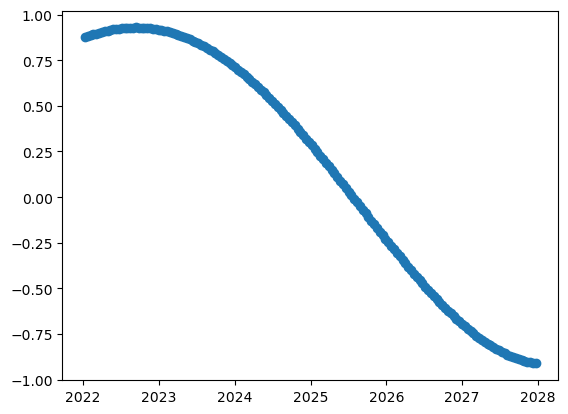

In [10]:
#plt.plot(x[0:-1],np.diff(sin6(x,*Var6)))

xxx=x[0:-1]
diff = np.diff((sin6(x,*Var6)))
Maske=(2022 < xxx) & (xxx < 2028)
xx = xxx[Maske]
yy = diff[Maske]

plt.scatter(xx,yy)


d=1
for n in range(len(yy)):
    if abs(d)>abs(yy[n]):
        d=yy[n]

np.where(yy==d)[0][0]
print(xx[ np.where(yy==d)[0][0] ])


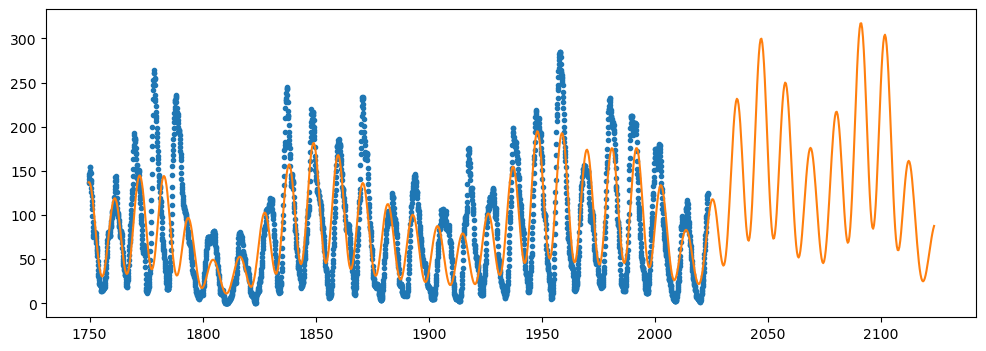

In [11]:
x=np.linspace(Dato_brøkdel[0] , Dato_brøkdel[-1] +100, 1000)
y=sin6(x,*Var6)

plt.figure(figsize=(12,4))

plt.plot(Dato_brøkdel , Monthly_smoothed_sunspot_number , '.')
plt.plot(x,y)

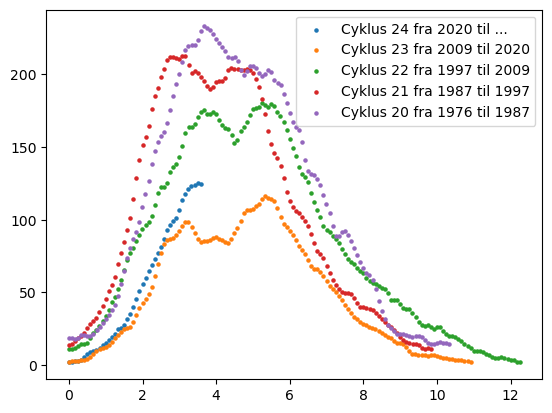

In [12]:
#1
def sin11(x,a,b,c,d):
    return a * np.sin( x * b + c ) + d
Var11 , Cov11 = curve_fit(sin11 , Cykler[23][0] , Cykler[23][1] , p0=[1,1,1,1])

#2
def sin22(x,a1,b1,c1,d1,a2,b2,c2,d2):
    return a1 * np.sin( x * b1 + c1 ) + d1 + a2 * np.sin( x * b2 + c2 ) + d2
Var22 , Cov22 = curve_fit(sin22 , Cykler[23][0] , Cykler[23][1] , p0=[*Var11,1,1,1,1])

#3
def sin33(x,a1,b1,c1,d1,a2,b2,c2,d2,a3,b3,c3,d3):
    return a1 * np.sin( x * b1 + c1 ) + d1 + a2 * np.sin( x * b2 + c2 ) + d2 + a3 * np.sin( x * b3 + c3 ) + d3
Var33 , Cov33 = curve_fit(sin33 , Cykler[23][0] , Cykler[23][1] , p0=[*Var22,1,1,1,1])

xx=np.linspace(Cykler[23][0][0] , Cykler[23][0][-1],1000)
yy=sin33(xx , *Var33)



plt.scatter(Cykler[24][0]-Cykler[24][0][0],Cykler[24][1], label=f'Cyklus 24 fra {round(Cykler[24][0][0])} til ...' , s=5)
plt.scatter(Cykler[23][0]-Cykler[23][0][0],Cykler[23][1], label=f'Cyklus 23 fra {round(Cykler[23][0][0])} til {round(Cykler[23][0][-1])}' , s=5)
plt.scatter(Cykler[22][0]-Cykler[22][0][0],Cykler[22][1], label=f'Cyklus 22 fra {round(Cykler[22][0][0])} til {round(Cykler[22][0][-1])}' , s=5)
plt.scatter(Cykler[21][0]-Cykler[21][0][0],Cykler[21][1], label=f'Cyklus 21 fra {round(Cykler[21][0][0])} til {round(Cykler[21][0][-1])}' , s=5)
plt.scatter(Cykler[20][0]-Cykler[20][0][0],Cykler[20][1], label=f'Cyklus 20 fra {round(Cykler[20][0][0])} til {round(Cykler[20][0][-1])}' , s=5)
plt.legend()

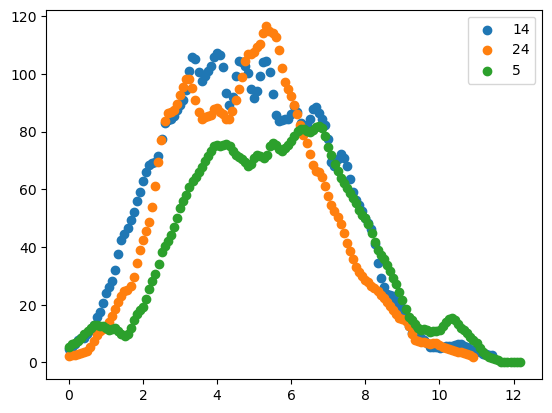

In [47]:

plt.scatter(Cykler[13][0]-Cykler[13][0][0],Cykler[13][1], label='14')

plt.scatter(Cykler[23][0]-Cykler[23][0][0],Cykler[23][1], label='24')

plt.scatter(Cykler[4][0]-Cykler[4][0][0],Cykler[4][1], label='5')

plt.legend()

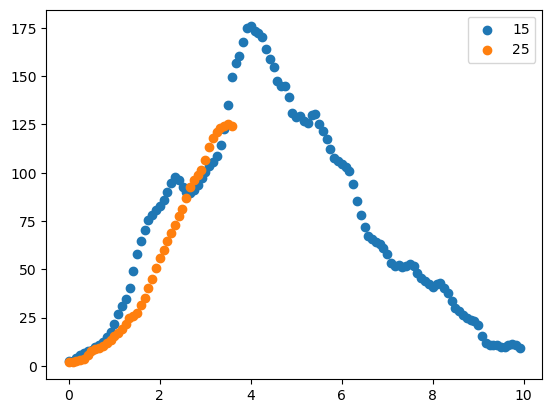

In [48]:

plt.scatter(Cykler[14][0]-Cykler[14][0][0],Cykler[14][1], label='15')

plt.scatter(Cykler[24][0]-Cykler[24][0][0],Cykler[24][1], label='25')

#plt.scatter(Cykler[6][0]-Cykler[6][0][0],Cykler[6][1], label='7')
plt.legend()

# Fouriertransformation

(0.4, 0.6)

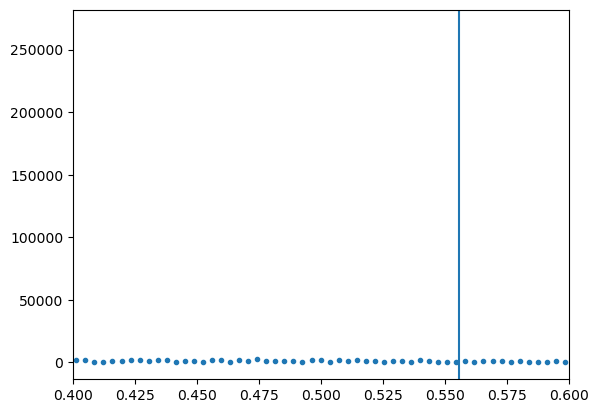

In [14]:

dato_s = Dato_brøkdel - Dato_brøkdel[0]

sample_rate = int(len(Monthly_smoothed_sunspot_number) / dato_s[-1])


yf = fft(Monthly_smoothed_sunspot_number)
xf = fftfreq(len(Monthly_smoothed_sunspot_number), 1/sample_rate)
plt.plot(xf, np.abs(yf), '.')
plt.axvline(1/90)
plt.axvline(1/11)
plt.axvline(1/11.9)
plt.axvline(1/21)
plt.axvline(1/5.5)
plt.axvline(1/1.8)
plt.xlim(0.4,0.6)

In [15]:
# for n in range( len(Cykler) ):
#     Maximum.append( [Cykler[n][0][ np.where(Cykler[n][1] == np.max(Cykler[n][1]))[0][0] ] ,
#                     Cykler[n][1][ np.where(Cykler[n][1] == np.max(Cykler[n][1]))[0][0] ]]  )

# Maximum_dato = np.array([])
# Maximum_plet = np.array([])

# for n in range( len(Cykler) ):
#     Maximum_dato = np.append( Cykler[n][0][ np.where(Cykler[n][1] == np.max(Cykler[n][1]))[0][0] ] , Maximum_dato)
#     Maximum_plet = np.append(Cykler[n][1][ np.where(Cykler[n][1] == np.max(Cykler[n][1]))[0][0] ] , Maximum_plet)

# Minimum_dato = []
# Minimum_plet = []

# for n in range( len(Cykler_max) ):
#     Minimum_dato.append( Cykler_max[n][0][ np.where(Cykler_max[n][1] == np.min(Cykler_max[n][1]))[0][0] ])
#     Minimum_plet.append(Cykler_max[n][1][ np.where(Cykler_max[n][1] == np.min(Cykler_max[n][1]))[0][0] ] )


# Minimum_dato = np.array([])
# Minimum_plet = np.array([])

# for n in range( len(Cykler_max) ):
#     Minimum_dato = np.append( Cykler_max[n][0][ np.where(Cykler_max[n][1] == np.min(Cykler_max[n][1]))[0][0] ] , Minimum_dato)
#     Minimum_plet = np.append(Cykler_max[n][1][ np.where(Cykler_max[n][1] == np.min(Cykler_max[n][1]))[0][0] ] , Minimum_plet)